# Lab 4: Replication of the results of the paper "Innovation and Institutional Ownership"



In [36]:
install.packages("haven")

In [ ]:
# it will take some time to install this package
install.packages("plm")

In [14]:
library(pacman)
p_load(data.table, magrittr, ggplot2, knitr, psych, stargazer, MASS,
        ISLR, wooldridge, performance, see, patchwork, haven, plm)

In [3]:
dt <- read_dta("../data/Aghion_2013.dta")

In [3]:
head(dt)

cusip,cic,data6,data12,data29,coname,gvkey,year,owncusip,instit_own,...,_Isic4_5616,_Isic4_5617,_Isic4_5621,_Isic4_6214,_Isic4_6215,_Isic4_6231,_Isic4_7211,_Isic4_7221,_Isic4_8123,_Isic4_9999
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
885535,104,293.890,408.388,1.896,3COM CORP,10553,1991,0008855351,63,...,0,0,0,0,0,0,0,0,0,0
885535,104,444.343,826.995,2.306,3COM CORP,10553,1993,0008855351,117,...,0,0,0,0,0,0,0,0,0,0
885535,104,839.676,1295.311,3.072,3COM CORP,10553,1994,0008855351,128,...,0,0,0,0,0,0,0,0,0,0
885535,104,1525.117,2327.101,5.19,3COM CORP,10553,1995,0008855351,199,...,0,0,0,0,0,0,0,0,0,0
885535,104,2266.275,3147.106,7.109,3COM CORP,10553,1996,0008855351,304,...,0,0,0,0,0,0,0,0,0,0
885535,104,4080.520,5420.367,12.92,3COM CORP,10553,1997,0008855351,348,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dim(dt)

[1] 6208  629

As you can see that we have so many variables in the dataset. We will spend some time to understand the dataset and the variables first.

## Greater institutional ownership is associated with more innovation

The key finding of the paper is that greater institutional ownership is associated with more innovation. We need to know:

- How to measure innovation?
- How to measure institutional ownership?


By reading the paper, we learned that authors are using `citation` as a measure of innovation. The number of citations a paper receives is a measure of how influential it is. The assumption is that more influential patents are more innovative.

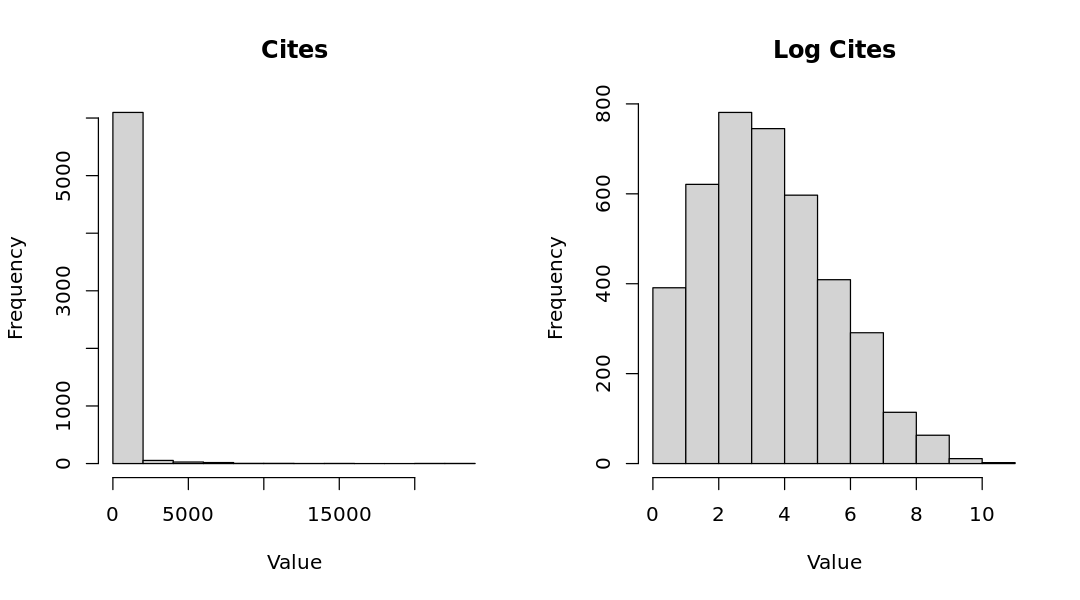

In [27]:
# let's check variables that include 'cite'
options(repr.plot.width = 9, repr.plot.height = 5)
dt %>%
    as.data.table() %>%
    # select columns - cites and lcites
    .[, .(cites, lcites)] -> citation_data

par(mfrow = c(1, 2))
hist(citation_data$cites, main = "Cites", xlab = "Value", ylab = "Frequency")
hist(citation_data$lcites, main = "Log Cites", xlab = "Value", ylab = "Frequency")

In [5]:
dt %>%
    as.data.table() %>%
    # get columns that include 'instit'
    .[, grep("instit", names(.)), with = FALSE] %>%
    head()

instit_own,instit_change,instit_held,instit_percown,dinit_instit,init_instit,linit_instit,dum_init_instit,sl_index_instit,d1instit_percown,...,instit_percown_91,instit_percown_92,instit_percown_five,instit_percown_n,dinstit_percown,dinstit_percown_n,instit_percown25,instit_percown_av,norminstit_percown,dnorminstit_percown
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,723,8128,28.12,28.12,28.12,3.336481,0,NA,NA,...,28.12,0,785.1104,0.7539862,NA,NA,1,37.11090,0.7577289,NA
117,5538,22301,80.27,NA,28.12,3.336481,0,0,NA,...,0.00,0,118.7996,1.9815488,NA,NA,1,40.47897,1.9830048,NA
128,598,22880,73.88,NA,28.12,3.336481,0,NA,-6.39,...,0.00,0,1021.0216,1.7149556,-6.39,-0.2665932,1,43.18488,1.7107838,-0.27222097
199,1242,53897,81.69,NA,28.12,3.336481,0,0,7.81,...,0.00,0,2029.1796,1.9022292,7.81,0.1872736,1,43.08064,1.8962116,0.18542778
304,2375,129476,78.74,NA,28.12,3.336481,0,NA,-2.95,...,0.00,0,820.4708,1.8175769,-2.95,-0.0846523,1,43.36016,1.8159528,-0.08025885
348,-37673,104539,59.41,NA,28.12,3.336481,0,NA,-19.33,...,0.00,0,921.4491,1.3564597,-19.33,-0.4611171,1,43.91281,1.3529083,-0.46304452


As you can see that we have many variables that include `instit` in the dataset. We will focus on the following variables:

- `instit_own`: number of institutional owners
- `instit_percown`: compacted percentage of institutional ownership

Now, we will replicate the Figure 1 of the paper.

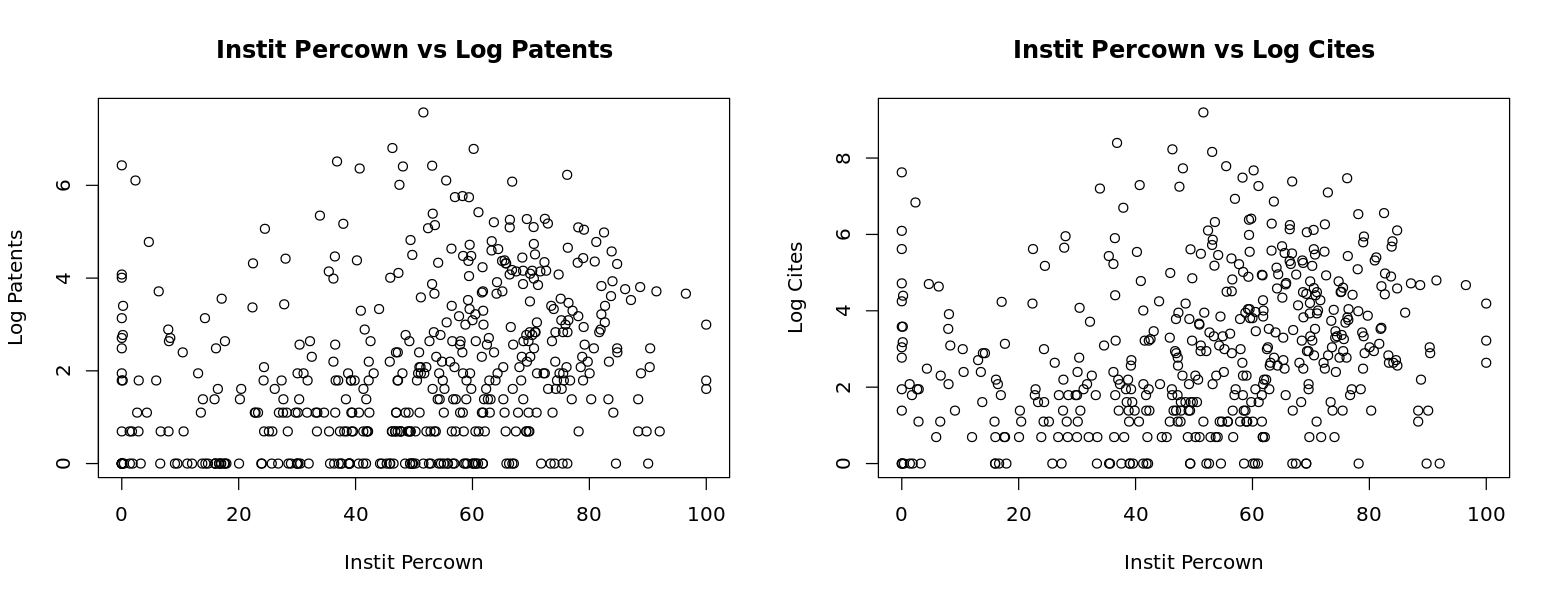

In [15]:
options(repr.plot.width = 13, repr.plot.height = 5)
par(mfrow = c(1, 2))
dt %>%
    as.data.table() %>%
    # we will choose 1997 year
    # the paper uses the average from 1995 to the end of the sample period (1999)
    .[year == 1997] %>%
    .[, .(instit_percown, lpat, lcites)] -> instit_data

plot(instit_data$instit_percown, instit_data$lpat, main = "Instit Percown vs Log Patents", xlab = "Instit Percown", ylab = "Log Patents")
plot(instit_data$instit_percown, instit_data$lcites, main = "Instit Percown vs Log Cites", xlab = "Instit Percown", ylab = "Log Cites")

From the above figure, we can see that there is a positive relationship between the number of institutional owners and the number of citations, even though the relationship is quite weak and noisy.

Now, we will fit a simple linear regression for the year of 1997 with the following model:

$$
lcites = \beta_0 + \beta_1 \times instit\_percown + \beta_2 sales + \beta_3 CLratio + \beta_4 R\&D + \epsilon$$

- `lcites`: log of the number of citations of patents
- `instit_percown`: institional research collaboration intensity
- `lsale`: log of sales (firm size)
- `lk_l`: log of capital labor ratio (input intensity)
- `sic4`: four-digit SIC code

In [17]:
dt %>%
    as.data.table() %>%
    # we will choose 1997 year
    # the paper uses the average from 1995 to the end of the sample period (1999)
    .[year == 1997] %>%
    .[, .(lcites, instit_percown, lsal, lk_l, sic4)] %>%
    head()

lcites,instit_percown,lsal,lk_l,sic4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.9864521,59.41,8.597919,4.755116,3341
NA,88.32,6.662012,4.054750,4238
4.8520303,49.70,9.382903,5.083426,3254
0.6931472,17.53,4.543954,4.039936,3353
NA,18.77,3.834667,3.817332,3322
3.3322046,74.46,5.048945,4.664208,3344


In [37]:
# fit with regression
dt %>%
    as.data.table() %>%
    # we will choose 1997 year
    # the paper uses the average from 1995 to the end of the sample period (1999)
    .[year == 1997] %>%
    .[, .(lcites, instit_percown, lsal, lk_l, sic4)] %>%
    # convert sic4 to factor
    .[, sic4 := as.factor(sic4)] %>%
    lm(lcites ~ instit_percown + lsal + lk_l + sic4, data = .) -> model1

In [39]:
stargazer(model1, type = "text", keep = c("instit_percown", "lsal", "lk_l"))


                        Dependent variable:    
                    ---------------------------
                              lcites           
-----------------------------------------------
instit_percown                0.006*           
                              (0.003)          
                                               
lsal                         0.643***          
                              (0.045)          
                                               
lk_l                         0.573***          
                              (0.134)          
                                               
-----------------------------------------------
Observations                    449            
R2                             0.644           
Adjusted R2                    0.548           
Residual Std. Error      1.326 (df = 353)      
F Statistic           6.719*** (df = 95; 353)  
Note:               *p<0.1; **p<0.05; ***p<0.01


## Introducing panel data

The paper uses panel data, which is a dataset that includes multiple observations for the same firms over time. In this case, the dataset includes observations for the same firms in multiple years.

To make sure the program knows we are dealing with panel data, we need to use the `pdata.frame` to create a panel data frame. We will use the `plm` package to estimate the model.

### Constructing the panel data frame

When we construct the panel data frame, we need to specify the following:

- The dataset
- id variable: the variable that identifies the firms
- time variable: the variable that identifies the date of the observations, which is the year in this case

Before we start, it is important to know two concepts:

- **balanced panel**: a panel dataset is balanced if all firms have observations for all years
- **unbalanced panel**: a panel dataset is unbalanced if some firms have observations for some years

In [5]:
# have a look at the dataset again
dt %>%
    as.data.table() %>%
    .[, .(num, coname, year, lcites, instit_percown, lsal, lk_l, sic4)] %>%
    head()

num,coname,year,lcites,instit_percown,lsal,lk_l,sic4
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3COM CORP,1991,3.332205,28.12,6.012218,4.145618,3341
1,3COM CORP,1993,5.468060,80.27,6.717799,4.249634,3341
1,3COM CORP,1994,6.025866,73.88,7.166506,4.327245,3341
1,3COM CORP,1995,6.315358,81.69,7.752378,4.508022,3341
1,3COM CORP,1996,5.777652,78.74,8.054238,4.582771,3341
1,3COM CORP,1997,5.986452,59.41,8.597919,4.755116,3341


In our dataset, the id variable is `num` and the time variable is `year`.
Therefore, we could construct the panel data frame with those two
variables.

In [32]:
dt %>%
    as.data.table() %>%
    .[, .(num, coname, year, lcites, instit_percown, lsal, lk_l, sic4)] %>%
    # convert sic4 to factor
    .[, sic4 := as.factor(sic4)] %>%
    pdata.frame(index = c("num", "year")) -> pdt

head(pdt)

,num,coname,year,lcites,instit_percown,lsal,lk_l,sic4
,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1-1991,1,3COM CORP,1991,3.332205,28.12,6.012218,4.145618,3341
1-1993,1,3COM CORP,1993,5.468060,80.27,6.717799,4.249634,3341
1-1994,1,3COM CORP,1994,6.025866,73.88,7.166506,4.327245,3341
1-1995,1,3COM CORP,1995,6.315358,81.69,7.752378,4.508022,3341
1-1996,1,3COM CORP,1996,5.777652,78.74,8.054238,4.582771,3341
1-1997,1,3COM CORP,1997,5.986452,59.41,8.597919,4.755116,3341


In [33]:
# check if the dataset is balanced
is.pbalanced(pdt)

[1] FALSE

In [29]:
pdt$year %>% summary()

1991 1992 1993 1994 1995 1996 1997 1998 1999 
 750  671  759  742  715  702  674  625  570 

In [10]:
# check dimensions
pdim(pdt)

Unbalanced Panel: n = 803, T = 2-9, N = 6208

Notice we have `6208` observations, whereas the authors used `4205` observations. Since the authors did not explain how they selected the observations, we will use all the observations in the dataset.

In [40]:
# now we will run the same regression with plm package
# we will just run the pooled OLS model with clustered standard errors
# we will use the same variables as in the previous regression
# we will also use year as dummy variables
pdt %>%
    plm(lcites ~ instit_percown + lsal + lk_l + sic4 + year,
                        model = "pooling", data = .) -> model2

stargazer(model2, type = "text", keep = c("instit_percown", "lsal", "lk_l"))


                   Dependent variable:    
               ---------------------------
                         lcites           
------------------------------------------
instit_percown          0.006***          
                         (0.001)          
                                          
lsal                    0.568***          
                         (0.014)          
                                          
lk_l                    0.433***          
                         (0.044)          
                                          
------------------------------------------
Observations              4,025           
R2                        0.582           
Adjusted R2               0.566           
F Statistic    36.950*** (df = 146; 3878) 
Note:          *p<0.1; **p<0.05; ***p<0.01


In [41]:
# reference: https://www.yabin-da.com/notes_in_r/how-to-do-clustering-for-panel-data-model-in-r/
# The first approach: vcovHC from the plm package
# 'arellano' is the recommanded method as it does not 
# impose restrictions on the structure of the variance-covariance matrix.
# cluster = 'group' indicates we cluster at county level
# type = 'HC3' is for small-sample adjustment.

# cluster standard errors
coeftest(model2, vcov = vcovHC(model2, method = 'arellano',
                                    cluster = 'group')) %>%
stargazer(type = "text", keep = c("instit_percown", "lsal", "lk_l"))


                   Dependent variable:    
               ---------------------------
                                          
------------------------------------------
instit_percown          0.006***          
                         (0.002)          
                                          
lsal                    0.568***          
                         (0.036)          
                                          
lk_l                    0.433***          
                         (0.092)          
                                          
Note:          *p<0.1; **p<0.05; ***p<0.01


As you can see that we got the almost same results as the authors. The coefficients are almost the same, but the standard errors are different. The authors might
use different clustering methods to calculate the standard errors.

## Fixed effects and random effects

When we estimate the model, we can use fixed effects or random effects. The fixed effects model is more restrictive than the random effects model. 

Fixed effects models involve including a set of dummy variables (also known as indicator variables) for each entity in the dataset. These dummy variables capture the individual-specific effects that do not change over time. By including these fixed effects, the model controls for any time-invariant characteristics of the entities that could potentially bias the estimates of the coefficients of interest.